In [8]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [12]:
df = pd.read_csv("data/candy-data.csv")
df['sugarpercent'] *= 100
df['pricepercent'] *= 100
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,73.199999,86.000001,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,60.399997,51.099998,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,1.100000,11.600000,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,1.100000,51.099998,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,90.600002,51.099998,52.341465


In [13]:
x_col1 = 'pricepercent'
x_col2 = 'sugarpercent'
y_col  = 'winpercent'

In [49]:
filtered1_df = df.copy()
filtered1_df['couleur'] = (2 * (df['winpercent'] > 50).astype(int) + (df[x_col1] > 50).astype(int)).map({0: 'Abordable/Santé &<br>Pas apprécié',1: 'Abordable/Santé &<br>Apprécié', 2: 'Chère/Sucré &<br>Pas apprécié', 3: 'Chère/Sucré &<br>Apprécié'})
filtered1_df = filtered1_df.sort_values('couleur', ascending=False)


filtered2_df = df.copy()
filtered2_df['couleur'] = (2 * (df['winpercent'] > 50).astype(int) + (df[x_col2] > 50).astype(int)).map({0: 'Abordable/Santé &<br>Pas apprécié', 1: 'Abordable/Santé &<br>Apprécié', 2: 'Chère/Sucré &<br>Pas apprécié', 3: 'Chère/Sucré &<br>Apprécié'})
filtered2_df = filtered2_df.sort_values('couleur', ascending=False)

In [15]:
#filtered_df = pd.concat(
#    objs=[filtered1_df[['competitorname', y_col, 'x_col', 'type', 'couleur']], filtered2_df[['competitorname', y_col, 'x_col', 'type', 'couleur']]]
#)
filtered2_df

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,couleur
27,Junior Mints,1,0,0,0,0,0,0,0,1,19.700000,51.099998,57.219250,"Chère, Pas aimé"
22,Hershey's Kisses,1,0,0,0,0,0,0,0,1,12.700000,9.300000,55.375454,"Chère, Pas aimé"
20,Haribo Sour Bears,0,1,0,0,0,0,0,0,1,46.500000,46.500000,51.412430,"Chère, Pas aimé"
43,Nestle Crunch,1,0,0,0,0,1,0,1,0,31.299999,76.700002,66.470680,"Chère, Pas aimé"
18,Haribo Gold Bears,0,1,0,0,0,0,0,0,1,46.500000,46.500000,57.119740,"Chère, Pas aimé"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,Fun Dip,0,1,0,0,0,0,1,0,0,73.199999,32.499999,39.185505,"Abordable, Aimé"
50,Red vines,0,1,0,0,0,0,0,0,1,58.099997,11.600000,37.348522,"Abordable, Aimé"
49,Pop Rocks,0,1,0,0,0,0,1,0,1,60.399997,83.700001,41.265511,"Abordable, Aimé"
17,Gobstopper,0,1,0,0,0,0,1,0,1,90.600002,45.300001,46.783348,"Abordable, Aimé"


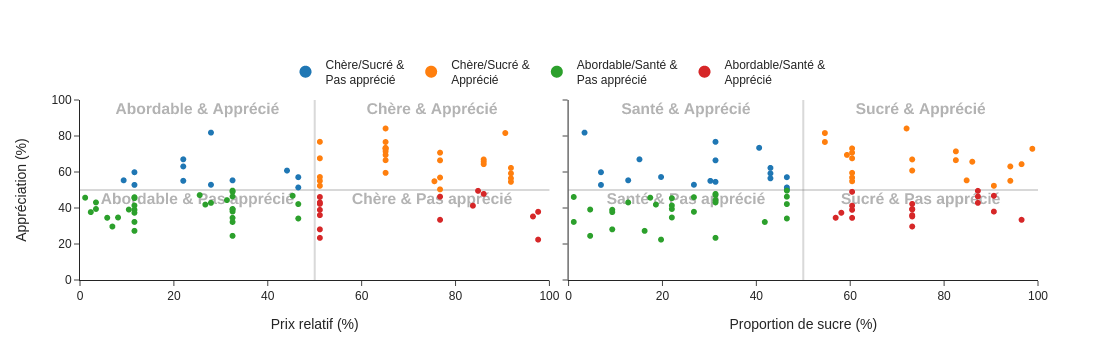

In [56]:
scat1 = px.scatter(filtered1_df, x=x_col1, y=y_col, color='couleur', hover_data=['competitorname'], template='simple_white')

scat2 = px.scatter(filtered2_df, x=x_col2, y=y_col, color='couleur', hover_data=['competitorname'], template='simple_white')
scat2.update_traces(xaxis='x2')
scat2.update_traces(yaxis='y2')
scat2.update_traces(showlegend=False)
#scat2.for_each_trace(lambda x: x.update(legendgroup=x['legendgroup'] + '-1'))

text = [
    # Text Right Graph
    go.Scatter(x=[25], y=[94], mode='text', text='<b style="color:grey; font-size:1.3em">Abordable & Apprécié</b>', textposition='middle center', textfont_color='rgba(80,80,80,0.6)', showlegend=False, xaxis='x', yaxis='y'),
    go.Scatter(x=[25], y=[44], mode='text', text='<b style="color:grey; font-size:1.3em">Abordable & Pas apprécié</b>', textposition='middle center', textfont_color='rgba(80,80,80,0.6)', showlegend=False, xaxis='x', yaxis='y'),
    go.Scatter(x=[75], y=[94], mode='text', text='<b style="color:grey; font-size:1.3em">Chère & Apprécié</b>', textposition='middle center', textfont_color='rgba(80,80,80,0.6)', showlegend=False, xaxis='x', yaxis='y'),
    go.Scatter(x=[75], y=[44], mode='text', text='<b style="color:grey; font-size:1.3em">Chère & Pas apprécié</b>', textposition='middle center', textfont_color='rgba(80,80,80,0.6)', showlegend=False, xaxis='x', yaxis='y'),
    
    # Text Left Graph
    go.Scatter(x=[25], y=[94], mode='text', text='<b style="color:grey; font-size:1.3em">Santé & Apprécié</b>', textposition='middle center', textfont_color='rgba(80,80,80,0.6)', showlegend=False, xaxis='x2', yaxis='y2'),
    go.Scatter(x=[25], y=[44], mode='text', text='<b style="color:grey; font-size:1.3em">Santé & Pas apprécié</b>', textposition='middle center', textfont_color='rgba(80,80,80,0.6)', showlegend=False, xaxis='x2', yaxis='y2'),
    go.Scatter(x=[75], y=[94], mode='text', text='<b style="color:grey; font-size:1.3em">Sucré & Apprécié</b>', textposition='middle center', textfont_color='rgba(80,80,80,0.6)', showlegend=False, xaxis='x2', yaxis='y2'),
    go.Scatter(x=[75], y=[44], mode='text', text='<b style="color:grey; font-size:1.3em">Sucré & Pas apprécié</b>', textposition='middle center', textfont_color='rgba(80,80,80,0.6)', showlegend=False, xaxis='x2', yaxis='y2'),
]

fig = go.Figure([*text, *scat1.data, *scat2.data], layout={
    "xaxis":  {'anchor': 'y' , 'domain': [0, .49], 'range': [0, 100], 'title': {'text': 'Prix relatif (%)'}},
    "xaxis2": {'anchor': 'y2', 'domain': [.51, 1], 'range': [0, 100], 'matches': 'x', 'title': {'text': 'Proportion de sucre (%)'}},
    "yaxis":  {'anchor': 'x' , 'domain': [0, 1]  , 'range': [0, 100], 'title': {'text': 'Appréciation (%)'}},
    "yaxis2": {'anchor': 'x2', 'domain': [0, 1]  , 'range': [0, 100], 'matches': 'y', 'showticklabels': False},
    "shapes":[
        {'layer': 'below', 'line': {'color': 'grey', 'width': 2}, 'type': 'line', 'x0': 50, 'x1': 50, 'xref': 'x'        , 'y0': 0 , 'y1': 1 , 'yref': 'y domain' },
        {'layer': 'below', 'line': {'color': 'grey', 'width': 2}, 'type': 'line', 'x0': 50, 'x1': 50, 'xref': 'x2'       , 'y0': 0 , 'y1': 1 , 'yref': 'y2 domain'},
        {'layer': 'below', 'line': {'color': 'grey', 'width': 2}, 'type': 'line', 'x0': 0 , 'x1': 1 , 'xref': 'x domain' , 'y0': 50, 'y1': 50, 'yref': 'y'        },
        {'layer': 'below', 'line': {'color': 'grey', 'width': 2}, 'type': 'line', 'x0': 0 , 'x1': 1 , 'xref': 'x2 domain', 'y0': 50, 'y1': 50, 'yref': 'y2'       }
    ],
    'legend' : {'itemsizing': 'constant', 'orientation': 'h', 'title': {'text': ''}, 'tracegroupgap': 0, 'x': 0.5, 'xanchor': 'center', 'y': 1.03, 'yanchor': 'bottom'},
    #'legend' : {'itemsizing': 'constant', 'orientation': 'h', 'title': {'text': ''}, 'tracegroupgap': 0, 'x': 0.25, 'xanchor': 'center', 'y': 1.03, 'yanchor': 'bottom'},
    # 'legend2': {'itemsizing': 'constant', 'orientation': 'h', 'title': {'text': ''}, 'tracegroupgap': 0, 'x': 0.75, 'xanchor': 'center', 'y': 1.03, 'yanchor': 'bottom'},
    'template': "simple_white"
})

fig.update_traces(hovertemplate="""
<b style="font-size: 1.3em">%{customdata}</b><br>
%{yaxis.title.text}: %{y}<br>
%{xaxis.title.text}: %{x}<br>
<extra></extra>
""", selector=dict(type="scatter", mode="markers"))
fig.update_traces(hoverinfo='skip', selector=dict(type="scatter", mode="text"))


#print(fig)